# **Question: 01** (2 Marks)

Let, $$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{2.1}$$

a. Find f(2)

b. Find f'(2)

Do not hardcode. Use Polynomial class.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

In [ ]:
#1st Mid question
#Question 1
coeff=([2, 1, -6, -2, 2.5, 1])
p=Polynomial(coeff)
eval_actual=p(2)
print(eval_actual)
print()
p_prime=p.deriv(1)
eval_deriv=p_prime(2)
print(eval_deriv)
print()

36.0

113.0



## Question 04 **[3 + 3 = 6 Marks]**


Suppose there is a function, $$ f(x) = x^4 + 3x^3 +2x^2 - 2x + 15$$

To analyze the behavior of the Absolute Error when approximating the derivative of the function at **$ x = 5 $** using **Central Difference**, you have to **determine the minimum value of h** that ensures the absolute error stays below a given **tolerance threshold of 0.002463**. Additionally, **calculate how many reductions of $ℎ$** are required to meet this condition.

As you already know,
1. Central Difference, $f^\prime(x) = \frac{f(x+h)-f(x-h)}{2*h}$
2. Absolute error = |Actual derivative - Approximate derivative|

You should start with an **initial step size of $ℎ = 0.5$** and iteratively **reduce $ℎ$ by one-third**, if necessary, until the error condition is satisfied.

**Hint:** You have to use **Polynomial class** from the **numpy** library to define the function, $f(x)$ and Your output should clearly state the **minimum $ℎ$** and the **total number of reductions** required to achieve the desired accuracy.


In [ ]:
#Question 4
def central_diff(f,h,x):
  return ((f(x+h)-f(x-h))/(2*h))

coeff=[15, -2, 2, 3, 1]
poly=Polynomial(coeff)
p_prime=poly.deriv(1)

h=0.5
threshold_val=0.002463
iterations=0
x_val=5
exact_val=p_prime(x_val)
while True:
  approx=central_diff(poly,h,x_val)
  error=abs(exact_val-approx)
  if error>threshold_val:
    h=h/3
    iterations+=1
  else :
    break

print(f"Number of iterations required :",iterations)
print(f"Minimum h to achieve |error| < {threshold_val} : {h:.12e}")


Number of iterations required : 4
Minimum h to achieve |error| < 0.002463 : 6.172839506173e-03


# **Question: 2**

You are given data points for a function, and you are required to apply Newton’s Divided Difference Interpolation to:


*   construct the interpolation polynomial
*   evaluate the interpolated value at a given point


Data Points:

x = [-1, 0, 1, 2]

y = [0.5, 3, 1.5, 8]

**Task (i) (3 Marks):**

Write a Python function divided_diff_table(x, y, n) that builds the divided difference table and returns the coefficients of the Newton polynomial.

**Task (ii) (3 Marks):**

Use the function from Task (i) to compute the interpolated value of the polynomial at x = 7. Also, display the coefficients of the Newton polynomial.

In [ ]:
#Question 2
def  divided_diff_table(x, y, n):
  coeff=np.zeros((n,n))
  coeff[:,0]=y
  for col in range(1, n): # Start from the second column
    for row in range(n - col): # Adjust the range for the inner loop
      coeff[row,col]=((coeff[row+1][col-1])-(coeff[row][col-1]))/(x[row+col]-x[row])

  return coeff[0]


data_x=np.array([-1, 0, 1, 2])
data_y=np.array([0.5, 3, 1.5, 8])
n=len(data_x)
x_val=np.array([7])
differences=divided_diff_table(data_x,data_y,n)
print("Newtons Coefficent : " , differences)

def get_newtons_polynomial(coeff,x_val):
  result=np.zeros(len(x_val))
  for i in range(len(x_val)):
    result[i]+=coeff[0]
    product=1.00
    for j in range(1,len(coeff)):
      product*=(x_val[i]-data_x[j-1])
      result[i]+=coeff[j]*product
  return result

p=get_newtons_polynomial(differences,x_val)
print("Newtons Polynomial Interpolated value : ",p)

def  get_newtons_polynomial_coefficient(coeff,data_x):
  f=Polynomial([0.00])
  product=Polynomial([1.00])
  for i in range(len(data_x)):
    f+=coeff[i]*product
    product*=Polynomial([-data_x[i],1]) # Corrected line

  return f

poly=get_newtons_polynomial_coefficient(differences,data_x)
print("Newtons Polynomial Coefficent : ",poly)

Newtons Coefficent :  [ 0.5  2.5 -2.   2. ]
Newtons Polynomial Interpolated value :  [580.5]
Newtons Polynomial Coefficent :  3.0 - 1.5·x - 2.0·x² + 2.0·x³


# **Question 3:**

You are given the following data points:

x = [0, 1, 2]

y = [1, 3, 2]

You are required to use the Vandermonde matrix method for polynomial interpolation.

**Task (i) (3 Marks):**

Construct the Vandermonde matrix for the given data points and compute the coefficients of the interpolating polynomial.

**Task (ii) (3 Marks):**

Using the polynomial coefficients from Task (i):


1.   Evaluate the interpolated value at x = 1.5.
2.   Plot the original data points and the interpolated polynomial over the interval x = 0 to x = 2.


In [ ]:
#Question 3
def get_poly(data_x,data_y):
  n=len(data_x)
  coeff_matrix=np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      coeff_matrix[i][j]=data_x[i]**j

  coeff_matrix_inv=np.linalg.pinv(coeff_matrix)
  a=np.dot(coeff_matrix_inv,data_y)
  poly=Polynomial(a)
  return poly

data_x=np.array([0, 1, 2])
data_y=np.array([1, 3, 2])
p=get_poly(data_x,data_y)
print(p)
result=p(1.5)
print(" Interpolated value :", result)

1.0 + 3.5·x - 1.5·x²
 Interpolated value : 2.874999999999998


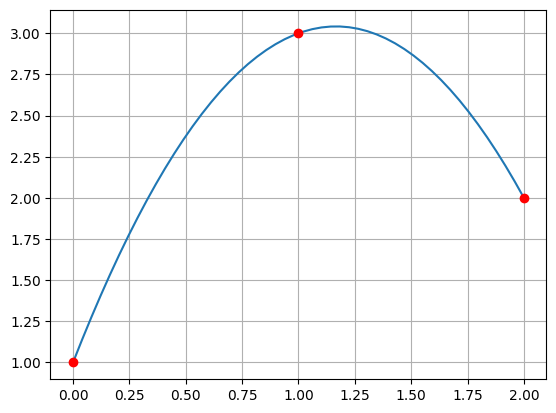

In [ ]:
x_data=np.linspace(0,2,50)
y_data=p(x_data)
plt.plot(x_data,y_data)
plt.plot(data_x,data_y,'ro')
plt.grid(True)





# **Question: 1**


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{1.1}$$

a. [1.5 Marks] Plot the function for $$-2.5 \le x \le 1.5$$

b. [2 Marks] What is the actual slope of $f(x)$ at $x = 0 , -1.18625$ ?  Print $f'(x)$ and plot $f'(x)$ at $ -2 \le x \le 1.2$.

For c to e, assume step size is $0.1$.

c. [1.5 Marks] Use forward differntiation to figure out the slope at $x = 0 , -1.18625$.

d. [1.5 Marks] Use backward differntiation to figure out the slope at $x = 0 , -1.18625$.

e. [1.5 Marks] Use central differntiation to figure out the slope at $x = 0 , -1.18625$.

In [ ]:
#2nd Mid question
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

 f'(x) : 1.0 - 12.0·x - 6.0·x² + 10.0·x³ + 5.0·x⁴ 

Exact value at 0.0 : 1.0
Exact value at -1.18625 : -9.340808105218201e-06



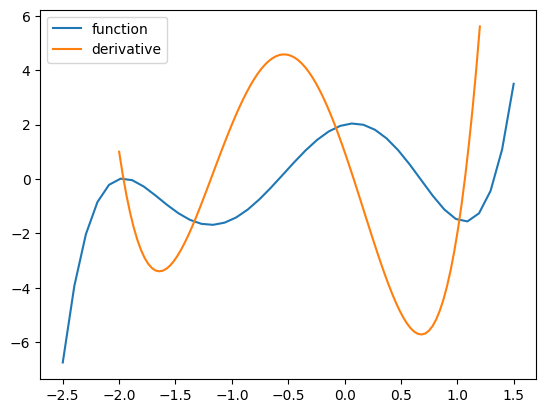

In [ ]:
#Question 1
#a
p1=Polynomial([2,1,-6,-2,2.5,1])
x_data1=np.linspace(-2.5,1.5,40)
y_data1=p1(x_data1)
plt.plot(x_data1, y_data1,label='function')

#b
p1_prime=p1.deriv(1)
print(f" f'(x) : {p1_prime} \n")
x_val=np.array([0,-1.18625])

for x in x_val:

  print(f"Exact value at {x} :",p1_prime(x))

print()
x_data2=x_data= np.linspace(-2,1.2,100)
y_data2=p1_prime(x_data2)
plt.plot(x_data2,y_data2,label='derivative')
plt.legend();
##2 ta graph eksthe kora, but you can do seperately also

##Rest of the questions are sameee
##also in question 1 c to e we did in the evaluation

# **Question 01 [5 Marks]**
a. Propose a best technique for numerical differentiation that provides higher accuracy than central difference method. You need to write a function for your proposed technique. [1 marks]

Let, $$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{1}$$

b. Using your proposed method, what is the slope of $f(x)$  at $x=0,−1.18625$ and $step size = 0.1$? [4 marks]


In [ ]:
#3rd MID question
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

In [ ]:
#a & b
#higher accuracy = Richardson Interpolation
def central_diff(f,h,x):
  return ((f(x+h)-f(x-h))/(2*h))

def richardson_interpolation(f,h,x):
  dh_1=central_diff(f,h/2,x)
  dh_2=central_diff(f,h,x)

  return ((4*dh_1-dh_2)/3)

coeffs = [2, 1, -6, -2, 2.5, 1]
p = Polynomial(coeffs)
x_val=np.array([0, -1.18625])
h=0.1
for x in x_val:
  print(f"Richardson interpolation at {x} ,{richardson_interpolation(p,h,x):.12f}")

Richardson interpolation at 0.0 ,0.999975000000
Richardson interpolation at -1.18625 ,-0.000034340808


# **Question 02 [5 Marks]**


The general form of $n$ degree Lagrange polynomial is given by

$$p_n(x) = \sum_{k=0}^n f(x_k)̧\cdot l_k(x) = \sum_{k=0}^n y_k\cdot l_k(x)\tag{2}$$

where

$$l_k(x) = \prod_{j=0, j\neq k}^n \frac{x-x_j}{x_k-x_j}\tag{3}$$

Now, you need to find a polynomial using Lagrange interpolation method, which approximaets $\sin(x)$ at points $x=-\pi/3, 0, \pi/2$

**Tasks:**

a) Using the `Polynomial` class from the NumPy library, construct the Lagrange basis polynomials $l_0(x), l_1(x)$ and $l_2(x)$ and print them. [3 marks]

b) Use the previously constructed basis polynomials to find the interpolated polynomial $p_n(x)$, and print it. [1 mark]

c) Evaluate the polynomial $p_n(x)$ at $x=\pi/3$ and print the result. [1 mark]

In [ ]:
def l_k(data_x):
  basis=[]

  for k in range(len(data_x)):
    f=Polynomial([1.00])
    denominator=1.00
    for i in range(len(data_x)):
      if i!=k:
        f*=Polynomial([-data_x[i],1])
        denominator*=(data_x[k]-data_x[i])
    f=f/denominator
    basis.append(f)
  return basis

data_x=np.array([-np.pi/3, 0, np.pi/2])
data_y=np.sin(data_x)
result=l_k(data_x)  ## it is receiving polynomial object
for i, poly in enumerate (result):  ## enumerate is used when you want to unpack polynomial object.
  print(f"l{i}(x) :", poly)
print()
interpolated_polynomial=Polynomial([0.00])
for i in range(len(data_x)):
  interpolated_polynomial+=data_y[i]*result[i]

print("Interpolated Polynomial : ",interpolated_polynomial)
print()

eval_val=interpolated_polynomial(np.pi/3)
print("Interpolated value at pi/3 : ",eval_val)


## Rest of the Questions are samee


l0(x) : 0.0 - 0.5729578·x + 0.36475626·x²
l1(x) : 1.0 + 0.31830989·x - 0.6079271·x²
l2(x) : 0.0 + 0.25464791·x + 0.24317084·x²

Interpolated Polynomial :  0.0 + 0.75084391·x - 0.07271735·x²

Interpolated value at pi/3 :  0.7065384140902211




#Question 4:
We have a function $f(x) =2x + 5 + 3x^{2}$.

A. Represent this function as polynomial and print it. [Hint. you can use any builtin library] &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**(1 Marks)**

B. Assume, $x = 5$ and $h = [1, 0.5, 0.25]$. Find out the value of first derivative of $f(x)$ function for each **h** value using the backward differentiation formula. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**(1.5 Marks)**

C. Calculate and display the differentiation error values that occur due to applying the backward difference formula for each value of h. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**(1.5 Marks)**

D. According to Richardson Extrapolation method,

$$D_{h}^{(1)} = \frac{4 D_{\frac{h}{2} } - D_{h}}{3}$$<br>

$$D_{h}^{(2)} = \frac{16 D_{\frac{h}{2}}^{(1)} - D_{h}^{(1)} }{15}$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; i. Convert $ D_{h}^{(1)}$, $D_{h}^{(2)}$ into python functions. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **(1 Marks)**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ii. Compute the Second Degree Richarson Extrapolation, $D_{h}^{(2)}$ at x = 5, h = 0.5. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **(1 Marks)**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

In [25]:
coeff=[5,2,3]
poly=Polynomial(coeff)
print(poly)
print()
hs=np.array([1,0.5,0.25])
x_val=5
def backward_diff(p,h,x):
  return ((p(x)-p(x-h))/h)
derivative_val=[]
for h in hs:
  result=backward_diff(poly,h,x_val)
  derivative_val.append(float(result))

print(derivative_val)
poly_prime=poly.deriv(1)
exact_val=poly_prime(x_val)
print("Exact val : " ,exact_val)
error=[]
for i in range(len(hs)):
  error.append((float)(exact_val-derivative_val[i]))

print("Error values : " ,error)

#d
def central_diff(p,h,x):
  return ((p(x+h)-p(x-h))/(2*h))

def richardson_interpolation(p,h,x):
  dh_1=central_diff(p,h/2,x)
  dh_2=central_diff(p,h,x)

  return ((4*dh_1-dh_2)/3)

def richardson_interpolation_2(p,h,x):
  dh_1=richardson_interpolation(p,h/2,x)
  dh_2=richardson_interpolation(p,h,x)
  return ((16*dh_1-dh_2)/15)

h_1=0.5
result=richardson_interpolation_2(poly,h_1,x_val)
print("Second degree Richardson Extrapolation : ",result)

5.0 + 2.0·x + 3.0·x²

[29.0, 30.5, 31.25]
Exact val :  32.0
Error values :  [3.0, 1.5, 0.75]
Second degree Richardson Extrapolation :  32.0


# **Question 2:** [6 Marks]

We already discussed the `calc_div_diff(x_data, y_data)` function in class to compute the full divided difference matrix from a set of known data points.

We also know that **Newton’s Divided Difference matrix** can be efficiently **extended** when a new node is added, instead of recomputing everything from scratch. This task focuses on implementing the function `expand_div_diff(x_data, y_data, diffMatrix)` to **append one new node** to an existing divided difference matrix.

---

Task 1: `expand_div_diff(x_data, y_data, diffMatrix)` \

You are given:

* `x_data`: a 1D list or array of the x-values (including the new node at the end),
* `y_data`: a 1D list or array of the y-values (including the new y),
* `diffMatrix`: a 2D numpy array containing the current divided difference table (upper-triangular),
  **excluding the last row and column** for the new node.

Your job is to:
1. Increase the shape by one.
2. Populate the secondary diagonal using,
   $$
   f[x_i, x_{i+1}, ..., x_{i+k}] = \frac{f[x_{i+1}, ..., x_{i+k}] - f[x_i, ..., x_{i+k-1}]}{x_{i+k} - x_i}
   $$
---

### Example:

```python
x_data = [1.0, 2.0, 4.0, 5.0]
y_data = [1.0, 4.0, 16.0, 26.0]

diffMatrix = np.array([
    [1.0, 3.0,  1.0],
    [4.0, 6.0,  0.0],
    [16.0, 0.0, 0.0]
])  # shape (3, 3)

# Your function should add the 4th row & 4th column
```

**Expected Output** (after expanding):

```python
array([
    [ 1.0,  3.0,  1.0, 0.08333333333 ],
    [ 4.0,  6.0,  1.3333333333, 0.0 ],
    [16.0,  10.0,  0.0, 0.0 ],
    [26.0,  0.0, 0.0, 0.0 ]
])
```

```Hint: The shape of the 2D array will increase by one```

Task 2: Expand a matrix
Now expand the following matrix.
```python
x_data = [0.5, 1.0, 2.0, 3.0]
y_data = [0.75, 1.0, 4.0, 9.0]

diffMatrix = np.array([
    [0.75,	0.5,	1.6666666666666667],
    [	1,	3,      0],
    [   4,  0,      0]
])
```

In [26]:
#Another MID question
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

In [30]:
def  expand_div_diff(x_data, y_data, diffMatrix):
  n=len(x_data)-1
  new_n=n+1
  new_diff_matrix=np.zeros((new_n,new_n))
  new_diff_matrix[:n,:n]=diffMatrix
  new_diff_matrix[new_n-1,0]=y_data[-1]
  for col in range(1,new_n):
    for row in range(new_n-col):
      new_diff_matrix[row,col]= (new_diff_matrix[row+1][col-1]-new_diff_matrix[row][col-1])/(x_data[row+col]-x_data[row])
  return new_diff_matrix


x_data = np.array([1.0, 2.0, 4.0, 5.0])
y_data = np.array ([1.0, 4.0, 16.0, 26.0])
diffMatrix = np.array([
    [1.0, 3.0,  1.0],
    [4.0, 6.0,  0.0],
    [16.0, 0.0, 0.0]
])

new_diff=expand_div_diff(x_data,y_data,diffMatrix)
print("\n New Matrix :  \n", new_diff)


 New Matrix :  
 [[ 1.          3.          1.          0.08333333]
 [ 4.          6.          1.33333333  0.        ]
 [16.         10.          0.          0.        ]
 [26.          0.          0.          0.        ]]


# **Question: 02**
Your phone has been losing charge far faster this week than last. You open its hidden system log and find only these four lines that mention screen-on time and the resulting battery drop:

```
1.0 hour screen-on time → 17 % lost  
3.5 hour screen-on time → 50 % lost  
4.0 hour screen-on time → 85 % lost
```
Later, a single extra line is appended:
```
5.0 hour screen-on time → 90 % lost
```
The log viewer refuses to draw a graph and the official battery-health tool is locked behind a server that is currently down.

All you have is the raw numbers and a sticky note on your desk that says:
<br></br>
<b><i>“Three (or more) exact readings → one unique predictive curve.”</i></b>
<br></br>
You want to know how much battery you would lose if you binge-scroll for **2.2** hours straight tonight.

### **a)** [3 Marks] Print the newton's basis for the polynomial constructed with the first three data points.
### **b)** [3 Marks] Now, write a function that adds new data to the previous data.
**[You are not allowed to hard code]**

In [37]:
#a & b
def calc_div_diff_matrix(x, y):
  n=len(x)
  coeff=np.zeros((n,n))
  coeff[:,0]=y
  for col in range(1,n):
    for row in range(n-col):
      coeff[row,col]= (coeff[row+1][col-1]-coeff[row][col-1])/(x[row+col]-x[row])
  return coeff

x =np.array( [1.0, 3.5, 4.0])
y = np.array([17.0, 50.0, 85.0])
Matrix=calc_div_diff_matrix(x,y)
print(Matrix)

def add_new_data(x,y,new_x,new_y):
  x=np.append(x,new_x)
  y=np.append(y,new_y)
  return x,y

x_new,y_new=add_new_data(x,y,5.0,90.0)
print("New data points : " , x_new)
print("New data points : " , y_new)
new_matrix=calc_div_diff_matrix(x_new,y_new)
print("New Matrix : \n" , new_matrix)


[[17.         13.2        18.93333333]
 [50.         70.          0.        ]
 [85.          0.          0.        ]]
New data points :  [1.  3.5 4.  5. ]
New data points :  [17. 50. 85. 90.]
New Matrix : 
 [[ 17.          13.2         18.93333333 -15.56666667]
 [ 50.          70.         -43.33333333   0.        ]
 [ 85.           5.           0.           0.        ]
 [ 90.           0.           0.           0.        ]]


## Question 3 **[4 + 2 marks]**


In Vandermonde matrix, the equation can be written as  $$\mathbf{Xa = y},$$
where in class we constructed, $\mathbf{X} = $

\begin{bmatrix}
x_0^0 & x_0^1 & \cdots & x_0^{n-1}  & x_0^n\\
x_1^0 & x_1^1 & \cdots & x_1^{n-1} & x_1^n\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
x_{n-1}^0 & x_{n-1}^1 & \cdots & x_{n-1}^{n-1}  & x_{n-1}^n\\
x_n^0 & x_{n}^1 & \cdots & x_n^{n-1} & x_n^n\\
\end{bmatrix}


**Now you have to implement the following matrix**

$\mathbf{X_{new}} = $
\begin{bmatrix}
x_n^n & x_{n}^{n-1} & \cdots & x_n^{1} & x_n^0\\
x_{n-1}^n & x_{n-1}^{n-1} & \cdots & x_{n-1}^{1} & x_{n-1}^{0}\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
x_1^n & x_1^{n-1} & \cdots & x_1^{1} & x_1^{0}\\
x_0^n & x_0^{n-1} & \cdots & x_0^{1} & x_0^{0}\\
\end{bmatrix}

Write a **function** that takes **data_x** as parameter and populates the **$X_{new}$** matrix. Use **(52,-90), (-30,-140), (-100,-3), (0,1), (38,10), (79,42)** data points. Print the matrix, **$X_{new}$** from the given data.


Next, take the **diagonal** elements of your Vandermonde matrix to be the coefficients of an n-degree Polynomial. Consider element with index [0,0] to be the **last coefficient** and with index [n,n] to be the **first coefficient**. Print the Polynomial.

Hint: Use the Polynomial class of Numpy

In [50]:
#Another MID question
def get_poly(data_x,data_y):
  n=len(data_x)
  X=np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      X[n-i-1,n-j-1]=data_x[i]**j   ## for reversing every row and column
  return (X)


data_x= np.array([52, -30, -100, 0, 38, 79])
data_y= np.array([-90, -140, -3, 1, 10, 42])
result=get_poly(data_x,data_y)
print("New Matrix : ",result)

coeffs=[]
for i in range(len(data_x)):
  for j in range(len(data_x)):
    if i==j:
      coeffs.append(result[i][j])
coeffs.reverse()
poly=Polynomial(coeffs)
print("Coefficients : ",poly)


New Matrix :  [[ 3.07705640e+09  3.89500810e+07  4.93039000e+05  6.24100000e+03
   7.90000000e+01  1.00000000e+00]
 [ 7.92351680e+07  2.08513600e+06  5.48720000e+04  1.44400000e+03
   3.80000000e+01  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [-1.00000000e+10  1.00000000e+08 -1.00000000e+06  1.00000000e+04
  -1.00000000e+02  1.00000000e+00]
 [-2.43000000e+07  8.10000000e+05 -2.70000000e+04  9.00000000e+02
  -3.00000000e+01  1.00000000e+00]
 [ 3.80204032e+08  7.31161600e+06  1.40608000e+05  2.70400000e+03
   5.20000000e+01  1.00000000e+00]]
Coefficients :  1.0 - 30.0·x + 10000.0·x² + 0.0·x³ + 2085136.0·x⁴ + (3.0770564e+09)·x⁵


In [ ]:
#DONE AND DUSTED !!! BEST OF LUCK